
# Project: TMDb Movie Data Analysis


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I have chose the TMDb Movie dataset which contains information about 10,000 movies collected from The Movie Database (TMDb) including popularity, cast, director, genres, release date, budget, revenue, and so on.

> The following are the questions I will focus on and investigate:
Questins:
> 1. What is the trend of number of movies released over time?
> 2. Which movies have the highest budget, revenue, and profit?
> 3. Which directors and casts are associated with movies that have high profits?
> 4. Which genres are associated with movies that have high profits?


In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Data Wrangling
In this section, I will load the dataset and display the general info of the data.

In [3]:
# import dataset
df = pd.read_csv('tmdb-movies.csv')

In [4]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# Rows and columns of the dataset
print("TMDB Dataset Rows : ", df.shape[0])
print("TMDB Dataset Columns : ", df.shape[1])

TMDB Dataset Rows :  10866
TMDB Dataset Columns :  21


In [6]:
# Statistical Values of the dataset
print("TMDB Dataset Descriptive Statistics")
df.describe()

TMDB Dataset Descriptive Statistics


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
# Data types of the datset
print("TMDB Dataset Data Type")
df.info()

TMDB Dataset Data Type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
bu

### Data Cleaning

In this section, I will trim and clean the data before the Exploratory Data Analysis.

> Observations
> 1. The columns 'id', 'imdb_id', 'budget',  'revenue', 'homepage', 'tagline', 'keywords', 'overview',  'runtime', 'production_companies', 'vote_count' are not relevant for the questions.
> 2. Since min value of budget_adj and revenue_adj are zero, there is more than one zero values for these columns.
> 3. There are also missing values for some columns.

> Clean process
> 1. Drop irrelevant columns
> 2. Remove duplicate rows
> 3. Replace zero values with mean value
> 4. Replace NaN values with "Not Found"
> 5. Convert release date from string to dateTime
> 6. Change name for budget_adj and revenue_adj to budget and revenue
> 7. Add a new column 'Profit'

In [8]:
# Remove irrelevant columns
df.drop(['id', 'imdb_id', 'budget',  'revenue', 'homepage', 'tagline', 'keywords', 'overview',  'runtime', 'production_companies', 'vote_count'], axis=1, inplace = True)
print("Removing unnecessary columns in the dataset: id, imdb_id, budtet, revenue, homepage, tagline, overview, production_companies, and vote_count")
df.head()

Removing unnecessary columns in the dataset: id, imdb_id, budtet, revenue, homepage, tagline, overview, production_companies, and vote_count


,popularity,original_title,cast,director,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,4/1/15,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
# Numbers of duplicate rows
print("Numbers of Duplicate rows : ")
df.duplicated().sum()

Numbers of Duplicate rows : 


1

In [10]:
# Remove duplicate row
df.drop_duplicates(inplace = True)

print("After removing duplicates, numbers of duplicate rows : ")
df.duplicated().sum()

After removing duplicates, numbers of duplicate rows : 


0

In [11]:
# Replace zero values with NaN
col_zero = ['budget_adj', 'revenue_adj']
df[col_zero] = df[col_zero].replace(0, np.NAN)
df.describe()

,popularity,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,10865.000000,5.169000e+03,4.849000e+03
mean,0.646446,5.975012,2001.321859,3.688907e+07,1.151009e+08
std,1.000231,0.935138,12.813260,4.196096e+07,1.988557e+08
min,0.000065,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.207575,5.400000,1995.000000,8.102293e+06,1.046585e+07
50%,0.383831,6.000000,2006.000000,2.271505e+07,4.395666e+07
75%,0.713857,6.600000,2011.000000,5.008384e+07,1.316482e+08
max,32.985763,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [12]:
# Fill replaced NaN values with mean value
df['budget_adj'].fillna(df['budget_adj'].mean(), inplace = True)
df['revenue_adj'].fillna(df['revenue_adj'].mean(), inplace = True)


In [13]:
# Numbers of NaN values
print("Numbers of NaN values : ")
df.isna().sum()

Numbers of NaN values : 


popularity         0
original_title     0
cast              76
director          44
genres            23
release_date       0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [14]:
# Replace NaN values
df.fillna(value = 'Not Found', inplace = True)

print("After replacing NaN values, numbers of NaN values : ")
df.isna().sum()

After replacing NaN values, numbers of NaN values : 


popularity        0
original_title    0
cast              0
director          0
genres            0
release_date      0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [15]:
# Convert release date from string to dateTime
df.release_date=pd.to_datetime(df.release_date) 
df.dtypes

popularity               float64
original_title            object
cast                      object
director                  object
genres                    object
release_date      datetime64[ns]
vote_average             float64
release_year               int64
budget_adj               float64
revenue_adj              float64
dtype: object

In [16]:
# Change name for budget_adj and revenue_adj

df.rename(columns={'budget_adj': 'budget', 'revenue_adj': 'revenue'}, inplace = True)

# Add new  column 'profit'
df['profit'] = df['revenue'] - df['budget']
df

,popularity,original_title,cast,director,genres,release_date,vote_average,release_year,budget,revenue,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2015-03-18,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,2015-12-15,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,2015-04-01,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09
5,9.110700,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Western|Drama|Adventure|Thriller,2015-12-25,7.2,2015,1.241999e+08,4.903142e+08,3.661143e+08
6,8.654359,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,Science Fiction|Action|Thriller|Adventure,2015-06-23,5.8,2015,1.425999e+08,4.053551e+08,2.627551e+08
7,7.667400,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,Drama|Adventure|Science Fiction,2015-09-30,7.6,2015,9.935996e+07,5.477497e+08,4.483897e+08
8,7.404165,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,Family|Animation|Adventure|Comedy,2015-06-17,6.5,2015,6.807997e+07,1.064192e+09,9.961120e+08
9,6.326804,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,Comedy|Animation|Family,2015-06-09,8.0,2015,1.609999e+08,7.854116e+08,6.244116e+08


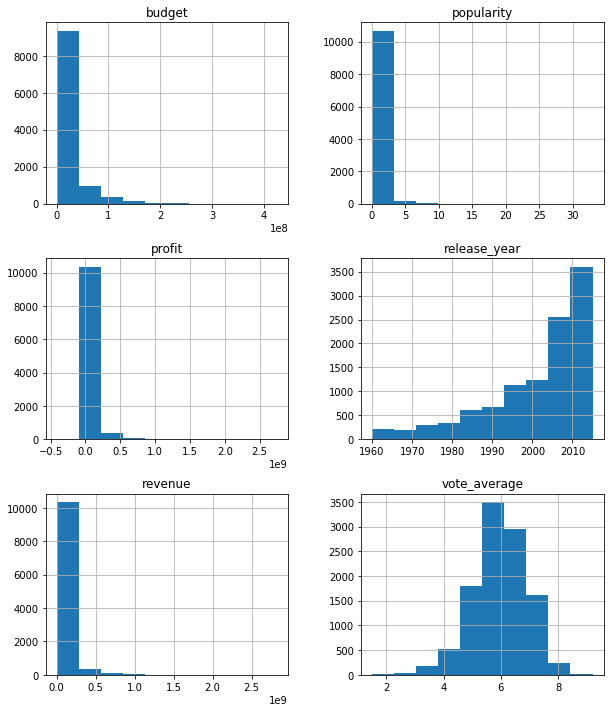

In [16]:
df.hist(figsize=(10,12));

<a id='eda'></a>
## Exploratory Data Analysis


### What is the trend of number of movies released over time?

Text(0,0.5,'movies')

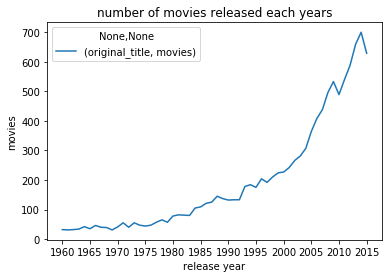

In [29]:
# Create new dataframe for number of movies count each year
df_movies = df.groupby('release_year').agg({'original_title':[('movies','count')]})

# Plot of the number of movies released over time
df_movies.plot(xticks = np.arange(1960,2016,5))

plt.title("number of movies released each years")
plt.xlabel('release year')
plt.ylabel('movies')

- The number of movies released continuously increased since 1960.
- The number of movies released increased dramatically since 2000.

### Which movies have the highest budget, revenue, and profit?


#### Highest profit movies

In [17]:
# New dataset for movie profit
df_profit = pd.melt(df, id_vars = ['original_title'], value_vars = ['profit'], value_name = 'profit')

In [18]:
# Top 10 movies with highest profit
df_profit.sort_values(['profit'], ascending = False).head(10)

,original_title,variable,profit
1329,Star Wars,profit,2.750137e+09
1386,Avatar,profit,2.586237e+09
5230,Titanic,profit,2.234714e+09
10593,The Exorcist,profit,2.128036e+09
9805,Jaws,profit,1.878643e+09
8888,E.T. the Extra-Terrestrial,profit,1.767968e+09
3,Star Wars: The Force Awakens,profit,1.718723e+09
8093,The Net,profit,1.551568e+09
10109,One Hundred and One Dalmatians,profit,1.545635e+09
7308,The Empire Strikes Back,profit,1.376998e+09


Text(0,0.5,'movies')

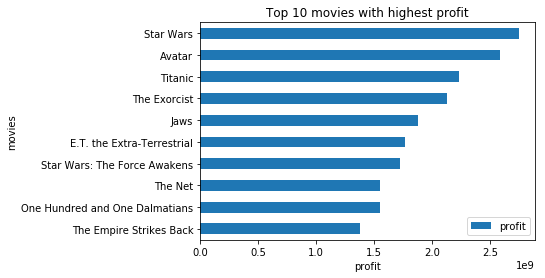

In [19]:
df_profit.sort_values(['profit'], ascending = False).head(10).plot(kind = 'barh', x = 'original_title')
plt.gca().invert_yaxis()
plt.title('Top 10 movies with highest profit')
plt.xlabel('profit')
plt.ylabel('movies')

#### Highest budget movies

In [20]:
# New dataset for movie budget
df_budget = pd.melt(df, id_vars = ['original_title'], value_vars = ['budget'], value_name = 'budget')

# Top 10 movies with highest budget
df_budget.sort_values(['budget'], ascending = False).head(10)

,original_title,variable,budget
2243,The Warrior's Way,budget,4.250000e+08
3374,Pirates of the Caribbean: On Stranger Tides,budget,3.683713e+08
7386,Pirates of the Caribbean: At World's End,budget,3.155006e+08
6569,Superman Returns,budget,2.920507e+08
5230,Titanic,budget,2.716921e+08
7393,Spider-Man 3,budget,2.713305e+08
1929,Tangled,budget,2.600000e+08
14,Avengers: Age of Ultron,budget,2.575999e+08
1389,Harry Potter and the Half-Blood Prince,budget,2.541001e+08
8088,Waterworld,budget,2.504192e+08


Text(0,0.5,'movies')

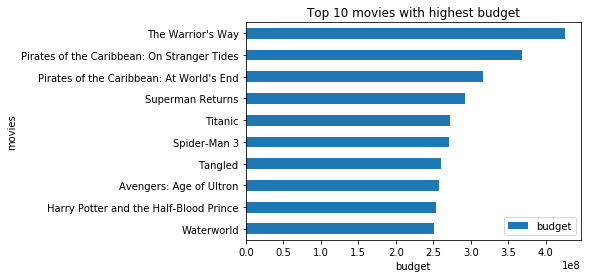

In [21]:
# Plot
df_budget.sort_values(['budget'], ascending = False).head(10).plot(kind = 'barh', x = 'original_title')
plt.gca().invert_yaxis()
plt.title('Top 10 movies with highest budget')
plt.xlabel('budget')
plt.ylabel('movies')

#### Highest revenue movies

In [22]:
# New dataset for movie budget
df_revenue = pd.melt(df, id_vars = ['original_title'], value_vars = ['revenue'], value_name = 'revenue')

# Top 10 movies with highest budget
df_revenue.sort_values(['revenue'], ascending = False).head(10)

,original_title,variable,revenue
1386,Avatar,revenue,2.827124e+09
1329,Star Wars,revenue,2.789712e+09
5230,Titanic,revenue,2.506406e+09
10593,The Exorcist,revenue,2.167325e+09
9805,Jaws,revenue,1.907006e+09
3,Star Wars: The Force Awakens,revenue,1.902723e+09
8888,E.T. the Extra-Terrestrial,revenue,1.791694e+09
8093,The Net,revenue,1.583050e+09
10109,One Hundred and One Dalmatians,revenue,1.574815e+09
4360,The Avengers,revenue,1.443191e+09


Text(0,0.5,'movies')

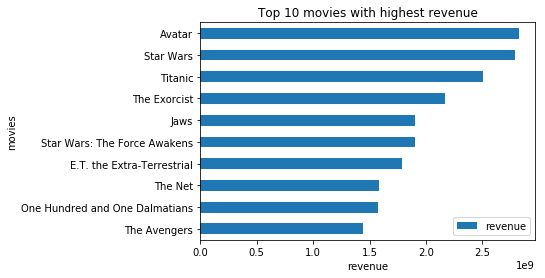

In [23]:
# Plot
df_revenue.sort_values(['revenue'], ascending = False).head(10).plot(kind = 'barh', x = 'original_title')
plt.gca().invert_yaxis()
plt.title('Top 10 movies with highest revenue')
plt.xlabel('revenue')
plt.ylabel('movies')

- Highest profit movies and highest revnue movies list look very similar to each other. Both top three highest profit and revenue are 'Star wars', 'Avatar' and 'Titanic'.
- The Avengers are in the top 10 highest revenue movies but not in top 10 highest profit movie. 
- The top three highest budget movies are 'The Warrior's Way', 'Pirates of the Caribbean: On Stranger Tides', and 'Pirates of the Caribbean: At World's End', but they didn't come up as a profitable movies.
- All the movies in the highest budget list except for 'Titanic' are not in the top 10 highest profit movies.

### Which directors and casts are associated with movies that have high profits?

We will assume that the high profit movies are the movies with profit more than 100 milion dollars.

In [32]:
# Create new dataframe to filter the movies with high profits. 

df_profited = df[df['profit'] >= 100000000]
df_profited.head()

,popularity,original_title,cast,director,genres,release_date,vote_average,release_year,budget,revenue,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2015-03-18,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,2015-12-15,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,2015-04-01,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


#### Casts with the high profit movies

In [37]:
# Create a new dataframe with casts split
data_cast = df_profited['cast'].str.cat(sep =  '|')
data_cast = pd.Series(data_cast.split('|'))

# Count the number of casts in the high profit movies
cast_count = data_cast.value_counts(ascending = False)
cast_count.head(20)

Tom Cruise               27
Tom Hanks                22
Samuel L. Jackson        21
Bruce Willis             20
Sylvester Stallone       20
Brad Pitt                18
Adam Sandler             17
Cameron Diaz             17
Harrison Ford            17
Eddie Murphy             17
Robert De Niro           17
Jim Carrey               16
Ving Rhames              15
Arnold Schwarzenegger    15
Gary Oldman              15
Nicolas Cage             15
Will Smith               15
Mel Gibson               15
Robin Williams           15
Julia Roberts            14
dtype: int64

- The actor that featured the most in the high profit movies is Tom Cruise followed by Tom Hanks.
- The female actress featured the most in the high profit movies is Cameron Diaz.
- Yhere are 18 males in the top 20 list whereas there are only 2 females.

#### Director with the high profit movies

In [39]:
# Create a new dataframe with director
data_director = df_profited['director']

# Count the number of casts in the high profit movies
director_count = data_director.value_counts(ascending = False)
director_count.head(20)

Steven Spielberg      23
Robert Zemeckis       13
Ron Howard            12
Ridley Scott           9
Clint Eastwood         9
Peter Jackson          9
Tim Burton             9
Michael Bay            8
Steven Soderbergh      8
Martin Scorsese        8
Wes Craven             7
David Fincher          7
James Cameron          7
M. Night Shyamalan     7
John Landis            7
Ivan Reitman           7
Chris Columbus         7
Gore Verbinski         7
Roland Emmerich        7
Uwe Boll               6
Name: director, dtype: int64

- The director who made the most high profit movies is Steven Spielberg with 23 movies.
- Robert Zemekis follows the second with 13 movies and followed by Ron howard with 12 movies.

### Which genres are associated with movies that have high profits?

In [41]:
# Create a new dataframe with genres split
data_genre = df_profited['genres'].str.cat(sep =  '|')
data_genre = pd.Series(data_genre.split('|'))

# Count the number of casts in the high profit movies
cast_genre = data_genre.value_counts(ascending = False)
cast_genre.head(10)

Drama              749
Comedy             613
Thriller           612
Action             595
Adventure          421
Horror             353
Science Fiction    313
Romance            269
Crime              265
Family             232
dtype: int64

- The most profitable genres are Drama, Comedy, Thriller, and Action.

<a id='conclusions'></a>
## Conclusions

The following analysis was done on the movies from 1960 to 2015.

Please note that there are huge numbers of missing data in genres, casts, and director columns which might have affected on the analysis.
Also, there was some error values for the movies too (e.g. some of the movies had $1 of the budget).
These analysis are simple correlations and comparisons and machine learning technique has not been used in this analysis.



> - The number of movie released gradually increased since 1960s and there is significant increase since 2000s.
> - Top three highest revenue and highest profit movies are both 'Star wars', 'Avator', and 'Titanic.'. When there is high revenue, there is also high profit. 
> - The top three highest budget movies are 'The Warrior's Way', 'Pirates of the Caribbean: On Stranger Tides', and 'Pirates of the Caribbean: At World's End', but they are not in the highest profit movies. The more budget spent doesn't necessarily lead to profitable movies, and the profitable movies are not necessarily high budgeted movies.
> - The top three casts featured in the movies with profit more than 100 million dollars are Tom Cruise, Tom Hanks, and Samuel L.Jackson.
> - The director made the most high profit movies is Steven Spielberg with 23 movies. 
> - The most popular genres for the high profit movies are Drama, Comedy, Thriller, and Action.


## Resources

- https://pandas.pydata.org
- https://stackoverflow.com
- https://github.com

In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0